In [362]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math; import numpy as np
import itertools; import scipy.io; import mat73

import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline

In [398]:
# Summer months considered to be days 200 to 290 approximately. 
season_start_day = 200
season_end_day = 213

year = 1977
for year in range(1977,1978): # to 2010
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    for i in range(len(npfile)):
        if npfile[i][4] > season_start_day and npfile[i][4] < season_end_day: 
            print('year:', year, 'day:', npfile[i][4],'depth:', npfile[i][6])
            print(i, npfile[i][15])
            

        else:
            pass

year: 1977 day: 212 depth: 48
141 Bottle
year: 1977 day: 212 depth: 58
142 Bottle


<class 'list'>


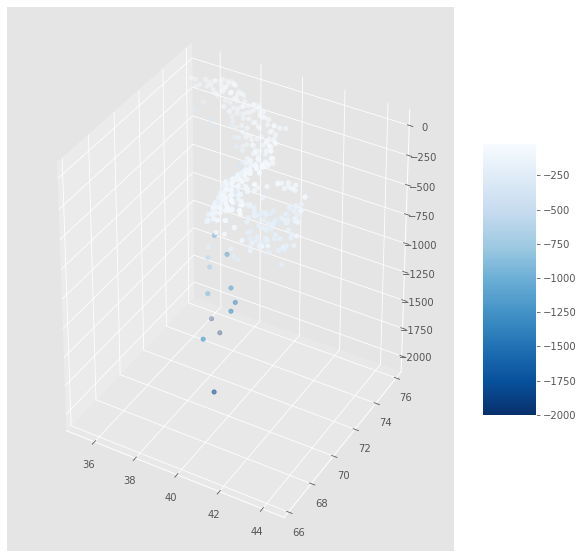

In [482]:
from scipy import interpolate
from scipy.interpolate import RegularGridInterpolator
from numpy import linspace, zeros, array

filename = 'casts_1977.mat'
file = scipy.io.loadmat(filename,squeeze_me=True)
npfile = file['casts_1977']

lat = []
lon = []
depth = []
for i in range(len(npfile)):
    lat.append(npfile[i][1])
    lon.append(npfile[i][2])
    depth.append(npfile[i][6])

x = lat
y = lon
z= np.array(depth)
znew = z*-1

znewlist = list(znew)
# print(znewlist)
print(type(znewlist))

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
# ax.invert_zaxis()
surf = ax.scatter3D(x, y, znewlist, c=znewlist, cmap='Blues_r',marker='o')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [441]:
from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z, kind='cubic')

<class 'numpy.ndarray'>


In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.basemap import Basemap

ID=[]
Latitude=[]
Longitude=[]
Depth=[]
cluster1='data1'
with open(cluster1) as f:
    lines = f.readlines()
    for line in lines:
        items = line.strip().split()
        lat = float(items[1])
        lon = float(items[2])
        dep = float(items[3])
        mag = float(items[4])
        Latitude.append(lat)
        Longitude.append(lon)
        Depth.append(dep)
        ID.append(mag)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(Longitude, Latitude, Depth, c=ID, marker='o')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (km)')
ax.invert_zaxis()
cb = fig.colorbar(p,label='Magnitude')
plt.savefig('plot1.png')

In [277]:
year = 1977

for year in range(1977,1980):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename)
    npfile = file['casts_{}'.format(year)]

    npfile_cast = [npfile['cast']][0][0]
    print(npfile_cast)
    
    npfile_lat = [npfile['lat']]
    npfile_lon = [npfile['lon']]
    npfile_yr = [npfile['yr']]
    npfile_yd = [npfile['yd']]
    npfile_dyd = [npfile['dyd']]
    npfile_depth = [npfile['depth']]
    npfile_pc = [npfile['pc']]
    npfile_vn = [npfile['vn']]
    npfile_np = [npfile['np']]
    npfile_s = [npfile['s']]
    npfile_t = [npfile['t']]
    npfile_p = [npfile['p']]
    npfile_cru = [npfile['cru']]
    npfile_opsid = [npfile['opsid']]
    npfile_gear = [npfile['gear']]
    
    cast_list = [] 
#     depth_list = []; lat_list = []; lon_list = []
    yd_list = []; #dyd_list = []; depth_list = []; pc_list = []
#     vn_list = []; np_list = []; cru_list = []; opsid_list = []; gear_list = []
    
    print(len(npfile_cast))
    for y in range(0,len(npfile_cast)):
        
        cast = [i[0][y] for i in npfile_cast]
        castlist = list(cast[0][0])
        castval = castlist[0]
        cast_list.append(castval)
        
        
#         lat = [i[0][y] for i in npfile_lat]
#         latlist = list(lat[0][0])
#         latval = latlist[0]
#         lat_list.append(latval)
        
#         lon = [i[0][y] for i in npfile_lon]
#         lonlist = list(lon[0][0])
#         lonval = lonlist[0]
#         lon_list.append(lonval)
        
        yd = [i[0][y] for i in npfile_yd]
        ydlist = list(yd[0][0])
        ydval = ydlist[0]
        yd_list.append(ydval)
        
    print(cast_list, yd_list)
    cast_list = np.array(cast_list)
    yd_list = np.array(yd_list)
    cast_list[yd_list<90]
        
#         dyd = [i[0][y] for i in npfile_dyd]
#         dydlist = list(dyd[0][0])
#         dydval = dydlist[0]
#         dyd_list.append(dydval)
        
#         p = [i[0][y] for i in npfile_p]
#         plist = list(p[0][0])
        
#         t = [i[0][y] for i in npfile_t]
#         tlist = list(t[0][0])
        
#         s = [i[0][y] for i in npfile_s]
#         slist = list(s[0][0])
        
#         depth = [i[0][y] for i in np2012depth]
#         depthlist = list(depth[0][0])
#         depthval = depthlist[0]
#         depth_list.append(depthval)
                
#         df_pts = pd.DataFrame({'p':plist,'t':tlist, 's':slist})
        
#         print(cast_list)
        
#         print(year,'; index:',y,'; dyd:',dydval,'; lat:',latval,'; lon:',lonval,'; depth:',depthval,'; cast:',castval)
        
#         plt.style.use('ggplot')        
#         plt.subplot(1, 2, 1)
#         plt.plot(df_pts['t'],df_pts['p']*-1*-1,color='blue')
#         plt.xlabel('Temperature')
#         plt.ylabel('Pressure')        
#         plt.subplot(1, 2, 2)
#         plt.plot(df_pts['s'],df_pts['p']*-1,color='red')
#         plt.xlabel('Salinity')
#         plt.ylabel('Pressure')
#         plt.tight_layout()
#         plt.show()
    
#         y = y + 1
        
#     year = year + 1

# yd = np.array(yd)
# cast = np.array(cast)
# cast[yd < 90] 

[[1]]
1


IndexError: invalid index to scalar variable.

In [28]:
# Can run all the files with a function definition. 
year = 1977
d = dict()
for year in range(1977,2010):
    matfile = "{}".format(year)
    name = 'mat'+ matfile
    filename = 'casts_{}.mat'.format(year)
    d["mat{0}".format(year)] = scipy.io.loadmat(filename)
    year = year + 1
# We run in some problems for files >= 2010. Need to use a HDF reader for matlab v7.3 files. 
## Will do this later.

In [281]:
year = 1977

for year in range(1977,1978):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename)
    npfile = file['casts_{}'.format(year)]

    npfile_cast = npfile['cast'][0][0][0][0]
    print(npfile_cast)

1


2015 ; index: 0 ; dyd: 72.25116898142733 ; lat: 39.27166666666667 ; lon: 72.94666666666667 ; depth: 28 ; cast: 1


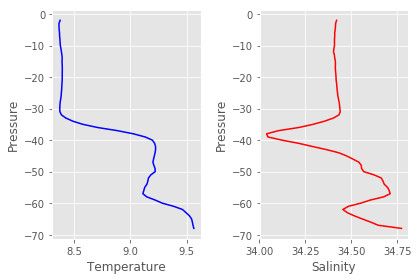

2016 ; index: 0 ; dyd: 98.66874999995343 ; lat: 40.47833333333333 ; lon: 73.81 ; depth: 28 ; cast: 1


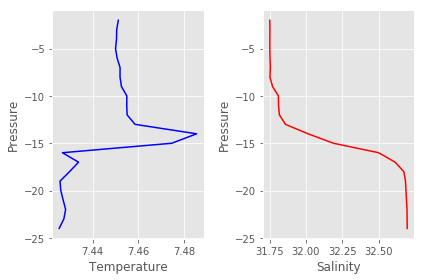

2017 ; index: 0 ; dyd: 41.7055555555271 ; lat: 41.25166666666667 ; lon: 71.17333333333333 ; depth: 28 ; cast: 1


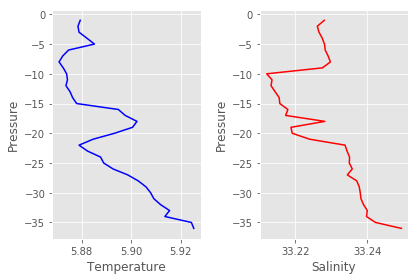

2018 ; index: 0 ; dyd: 72.81388888892252 ; lat: 36.876666666666665 ; lon: 75.71833333333333 ; depth: 28 ; cast: 1


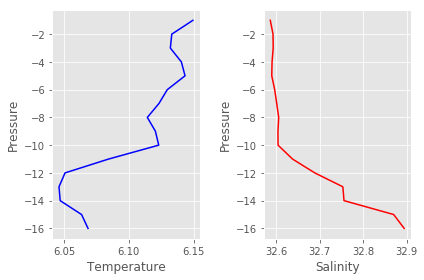

In [247]:
year = 2015

for year in range(2015,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename)
    npfile = file['casts_{}'.format(year)]
    
    # print(npfile.dtype.names) ### There should be 16.
    npfile_cast = [npfile['cast']]
    npfile_lat = [npfile['lat']]
    npfile_lon = [npfile['lon']]
    npfile_yr = [npfile['yr']]
    npfile_yd = [npfile['yd']]
    npfile_dyd = [npfile['dyd']]
    npfile_depth = [npfile['depth']]
    npfile_pc = [npfile['pc']]
    npfile_vn = [npfile['vn']]
    npfile_np = [npfile['np']]
    npfile_s = [npfile['s']]
    npfile_t = [npfile['t']]
    npfile_p = [npfile['p']]
    npfile_cru = [npfile['cru']]
    npfile_opsid = [npfile['opsid']]
    npfile_gear = [npfile['gear']]
    
    cast_list = []; depth_list = []; lat_list = []; lon_list = []
    yd_list = []; dyd_list = []; depth_list = []; pc_list = []
    vn_list = []; np_list = []; cru_list = []; opsid_list = []; gear_list = []
    
    y = 0
    
    for y in range(0,len(npfile_cast)):       
        cast = [i[0][y] for i in npfile_cast] ### Cast
        castlist = list(cast[0][0])
        castval = castlist[0]
        cast_list.append(castval)
        lat = [i[0][y] for i in npfile_lat] ### Latitude
        latlist = list(lat[0][0])
        latval = latlist[0]
        lat_list.append(latval)        
        lon = [i[0][y] for i in npfile_lon] ### Longitude
        lonlist = list(lon[0][0])
        lonval = lonlist[0]
        lon_list.append(lonval)    
        yd = [i[0][y] for i in npfile_yd] ### yd
        ydlist = list(yd[0][0])
        ydval = ydlist[0]
        yd_list.append(ydval)
        dyd = [i[0][y] for i in npfile_dyd] ### dyd
        dydlist = list(dyd[0][0])
        dydval = dydlist[0]
        dyd_list.append(dydval)
        depth = [i[0][y] for i in np2012depth] ### Depth
        depthlist = list(depth[0][0])
        depthval = depthlist[0]
        depth_list.append(depthval)
        ###### Still missing p, vn, np, cru, opsid, and gear. Streamline this.
        p = [i[0][y] for i in npfile_p] ### Pressure
        plist = list(p[0][0])
        t = [i[0][y] for i in npfile_t] ### Temperature
        tlist = list(t[0][0])
        s = [i[0][y] for i in npfile_s] ### Salinity
        slist = list(s[0][0])
        
        df_pts = pd.DataFrame({'p':plist,'t':tlist, 's':slist})
        
        print(year,'; index:',y,'; dyd:',dydval,'; lat:',latval,'; lon:',lonval,'; depth:',depthval,'; cast:',castval)
        
        plt.style.use('ggplot')        
        plt.subplot(1, 2, 1)
        plt.plot(df_pts['t'],df_pts['p']*-1,color='blue')
        plt.xlabel('Temperature')
        plt.ylabel('Pressure')        
        plt.subplot(1, 2, 2)
        plt.plot(df_pts['s'],df_pts['p']*-1,color='red')
        plt.xlabel('Salinity')
        plt.ylabel('Pressure')
        plt.tight_layout()
        plt.show()
    
        y = y + 1
        
    year = year + 1  

In [ ]:
# with h5py.File("f.mat") as f:
#     data = [f[element[0]][:] for element in f['rank']]

In [244]:
cast_list = []
depth_list = []
p_list = []

y = 0
for y in range(3,6): # range upper bound is 2093
    depth = [i[0][y] for i in np2012depth]
    depthlist = list(depth[0][0])
    depthval = depthlist[0]
    depth_list.append(depthval)
    
    cast = [i[0][y] for i in np2012cast]
    castlist = list(cast[0][0])
    castval = castlist[0]
    cast_list.append(castval)
    
    p = [i[0][y] for i in np2012p]
    plist = list(p[0][0])
    
    t = [i[0][y] for i in np2012t]
    tlist = list(t[0][0])
    
    s = [i[0][y] for i in np2012s]
    slist = list(s[0][0])
    
    df_pts = pd.DataFrame({'p':plist,'t':tlist, 's':slist})

print(df_pts)
# # print(df_pts)
# for temp in df_pts['t']:
#     for i in range(len(df_pts['t'])):
#         print(i)
i = 0
for i in range(len(df_pts['t'])):
    if df_pts['t'][i] - 0.2 > df_pts['t'][i]:
        print ('now')
    else:
        print('no')
    i += 1

#         if df_pts['t'][i + 1] <= df_pts['t'][i] - 0.2:
#             print('yes',i)
#         else:
#             print (df_pts['t'][i])
# if change_t <= 0.2:
# print(df_pts['t'][3])

# len(df_pts['t'])

# plt.style.use('ggplot')        
# plt.subplot(1, 2, 1)
# plt.plot(df_pts['t'],df_pts['p']*-1,color='blue')
# plt.xlabel('Temperature')
# plt.ylabel('Pressure')        
# plt.subplot(1, 2, 2)
# plt.plot(df_pts['s'],df_pts['p']*-1,color='red')
# plt.xlabel('Salinity')
# plt.ylabel('Pressure')
# plt.tight_layout()
# plt.show()

     p      t       s
0    1   9.38  34.073
1    2   9.38  34.075
2    3   9.38  34.075
3    4   9.38  34.075
4    5   9.38  34.076
5    6   9.39  34.076
6    7   9.38  34.076
7    8   9.39  34.077
8    9   9.39  34.077
9   10   9.39  34.078
10  11   9.39  34.081
11  12   9.39  34.081
12  13   9.39  34.080
13  14   9.39  34.079
14  15   9.39  34.081
15  16   9.39  34.079
16  17   9.39  34.080
17  18   9.39  34.080
18  19   9.39  34.079
19  20   9.39  34.079
20  21   9.39  34.083
21  22   9.40  34.084
22  23   9.40  34.083
23  24   9.40  34.085
24  25   9.40  34.085
25  26   9.40  34.084
26  27   9.40  34.091
27  28   9.40  34.087
28  29   9.42  34.092
29  30   9.42  34.094
30  31   9.42  34.094
31  32   9.43  34.097
32  33   9.44  34.102
33  34   9.44  34.102
34  35   9.44  34.101
35  36   9.43  34.099
36  37   9.43  34.098
37  38   9.43  34.095
38  39   9.44  34.110
39  40   9.43  34.102
40  41   9.46  34.103
41  42   9.50  34.112
42  43   9.59  34.132
43  44   9.68  34.186
44  45   9

In [ ]:
#     plt.style.use('ggplot')
#     plt.figure(figsize=(3, 3))
#     plt.plot(df_pts['s'],df_pts['p']*-1,color='blue')
#     plt.show()
    
#     y = y + 1

# print(len(cast_list))
# print(len(depth_list))
# df_castanddepth = pd.DataFrame({'cast':cast_list,'depth':depth_list})
# print(df_castanddepth)
#     cast = [i[0][y] for i in np2012cast]
#     for z in range
#     depthlist = list[depth[y][z]]
#     print(type(depthval))
# depth = [i[0][2091] for i in np2012depth]
# depthlist = list(depth[0][0])
# print(depthlist[0])
# print(depth, depthlist)

In [51]:
# Run each file separately as we want to look at each file separately for now. 
mat1977 = scipy.io.loadmat('casts_1977.mat')
mat2009 = scipy.io.loadmat('casts_2009.mat')
mat2012 = scipy.io.loadmat('casts_2012.mat')

In [245]:
# print(type(mat2009))
# print(mat2009.keys())
# print(type(mat2009['casts_2009']))
np2012 = mat2009['casts_2009']
# print(np2012.dtype.names)
np2012depth = [np2012['depth']]
np2012cast = [np2012['cast']]
np2012pc = [np2012['pc']]
np2012vn = [np2012['vn']]
np2012s = [np2012['s']]
np2012t = [np2012['t']]
np2012p = [np2012['p']]
np2012gear = [np2012['gear']]


# print('--depth--',np2012depth)
# print('--pc--',np2012pc)
# print('--vn--',np2012vn)
# print('--s--',np2012s)
# print('--t--',np2012t)
# print('--p--',np2012p)


depth1 = [i[0][0] for i in np2012depth]
p1 = [i[0][5] for i in np2012p]
t1 = [i[0][0] for i in np2012t]
s1 = [i[0][0] for i in np2012s]

# depth1list = list(depth1[0][0])
p1list = list(p1[0][0])
p2list = list(p1[0][0])

t1list = list(t1[0][0])
s1list = list(s1[0][0])

# print(depth1list[0])
# print(p1list[0])
# print(t1list[0])
# print(s1list[0])

print(depth1)

# print(type(depth1list[0]))
# df_pandt = pd.DataFrame({'p':p1list,'t':t1list})
# df_pands = pd.DataFrame({'p':p1list,'s':s1list})
# print(df_pandt)

[array([[28]], dtype=uint8)]


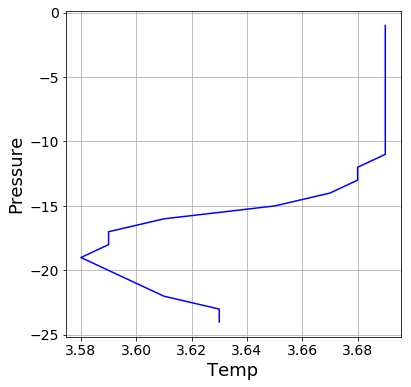

In [14]:
plt.figure(figsize=(6, 6))
ax = plt.axes() 
ax.yaxis.grid() # horizontal lines
ax.xaxis.grid() # vertical lines
ax = plt.gca()
ax.grid(True)
plt.xlabel('Temp',fontsize=18)
plt.ylabel('Pressure',fontsize=18)
plt.plot(df_pandt['t'],df_pandt['p']*-1,color='blue')
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 14)
plt.show()

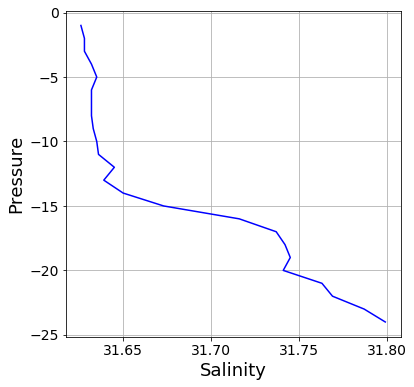

0     31.626
1     31.628
2     31.628
3     31.632
4     31.635
5     31.632
6     31.632
7     31.632
8     31.633
9     31.635
10    31.636
11    31.645
12    31.639
13    31.650
14    31.673
15    31.716
16    31.737
17    31.742
18    31.745
19    31.741
20    31.763
21    31.769
22    31.787
23    31.799
Name: s, dtype: float64
0     3.69
1     3.69
2     3.69
3     3.69
4     3.69
5     3.69
6     3.69
7     3.69
8     3.69
9     3.69
10    3.69
11    3.68
12    3.68
13    3.67
14    3.65
15    3.61
16    3.59
17    3.59
18    3.58
19    3.59
20    3.60
21    3.61
22    3.63
23    3.63
Name: t, dtype: float64


In [15]:
plt.figure(figsize=(6, 6))
ax = plt.axes() 
ax.yaxis.grid() # horizontal lines
ax.xaxis.grid() # vertical lines
ax = plt.gca()
ax.grid(True)
plt.xlabel('Salinity',fontsize=18)
plt.ylabel('Pressure',fontsize=18)
plt.plot(df_pands['s'],df_pands['p']*-1,color='blue')
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 14)
plt.show()

In [264]:
mat2009.keys()
type(mat2009['casts_2009']),mat2009['casts_2009'].shape
type(mat2009['casts_2009'][0][0]),mat2009['casts_2009'][0][0].shape
mat2009['casts_2009'][0][0]['cast'], mat2009['casts_2009'][0][0]['depth']
[item.flat[0] for item in mat2009['casts_2009'][0][0]]
# print('mat2009')
# print('----')
data = [[row.flat[0] for row in line] for line in mat2009['casts_2009'][0]]
columns = ['cast','lat', 'lon', 'yr', 'yd', 'dyd','depth','pc','vn','np','s','t','p','cru','opsid','gear']
df_2009 = pd.DataFrame(data, columns=columns)
# print(df_2009)
# print('----')
# latitude = df_2009['lat']
# print(latitude.max())
# print(latitude.min())
# print(latitude.mean())
# print('----')
# longitude = df_2009['lon']
# print(longitude.max())
# print(longitude.min())
# print(longitude.mean())

In [269]:
df_2009.explode('t')

,cast,lat,lon,yr,yd,dyd,depth,pc,vn,np,s,t,p,cru,opsid,gear
0,1,40.9433,71.9817,2009,58,58.9638,28,10,1,24,31.626,3.69,1,[HB0901],[2009001HB],SBE-19
1,1,39.8900,73.0067,2009,15,15.5125,50,90,1,49,NaN,9.39,1,[DEL0901],[2009001DE],SBE-19
2,2,40.9533,72.0183,2009,59,59.1154,27,10,1,22,31.715,3.81,1,[HB0901],[2009001HB],SBE-19
3,2,39.8883,73.0067,2009,15,15.5229,50,90,1,49,34.099,9.42,1,[DEL0901],[2009001DE],SBE-19
4,3,40.9617,72.0000,2009,59,59.2529,26,10,1,21,31.723,3.81,1,[HB0901],[2009001HB],SBE-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,119,43.0567,69.8433,2009,323,323.8196,186,22,11,181,33.060,9.94,1,[DEL0911],[2009011DE],SBE-19+
2089,120,43.0600,70.3450,2009,323,323.9271,121,22,11,115,32.603,9.69,1,[DEL0911],[2009011DE],SBE-19+
2090,121,42.8967,70.5100,2009,323,323.9875,75,22,11,70,31.674,9.25,1,[DEL0911],[2009011DE],SBE-19+
2091,122,42.4200,70.6083,2009,324,324.1229,87,22,11,81,31.759,10.65,1,[DEL0911],[2009011DE],SBE-19+


In [123]:
mat1977.keys()
type(mat1977['casts_1977']),mat1977['casts_1977'].shape
type(mat1977['casts_1977'][0][0]),mat1977['casts_1977'][0][0].shape
mat1977['casts_1977'][0][0]['cast'], mat1977['casts_1977'][0][0]['depth']
[item.flat[0] for item in mat1977['casts_1977'][0][0]]
# print('mat1977')

data = [[row.flat[0] for row in line] for line in mat2009['casts_2009'][0]]
columns = ['cast','lat', 'lon', 'yr', 'yd', 'dyd','depth','pc','vn','np','s','t','p','cru','opsid','gear']
df_1977 = pd.DataFrame(data, columns=columns)
print(df_1977)

print('----')

latitude1977 = df_1977['lat']
print(latitude1977.max())
print(latitude1977.min())
print(latitude1977.mean())

print('----')

longitude1977 = df_1977['lon']
print(longitude1977.max())
print(longitude1977.min())
print(longitude1977.mean())

      cast      lat      lon    yr   yd       dyd  depth  pc  vn   np       s  \
0        1  40.9433  71.9817  2009   58   58.9638     28  10   1   24  31.626   
1        1  39.8900  73.0067  2009   15   15.5125     50  90   1   49     NaN   
2        2  40.9533  72.0183  2009   59   59.1154     27  10   1   22  31.715   
3        2  39.8883  73.0067  2009   15   15.5229     50  90   1   49  34.099   
4        3  40.9617  72.0000  2009   59   59.2529     26  10   1   21  31.723   
...    ...      ...      ...   ...  ...       ...    ...  ..  ..  ...     ...   
2088   119  43.0567  69.8433  2009  323  323.8196    186  22  11  181  33.060   
2089   120  43.0600  70.3450  2009  323  323.9271    121  22  11  115  32.603   
2090   121  42.8967  70.5100  2009  323  323.9875     75  22  11   70  31.674   
2091   122  42.4200  70.6083  2009  324  324.1229     87  22  11   81  31.759   
2092   123  42.0817  70.5383  2009  324  324.2208     42  22  11   36  31.707   

          t  p        cru  

In [246]:
# print(df_1977['gear'])
# print(df_1977['gear'].unique)
print(df_1977.gear.unique())
print(df_1977.lat.unique())

print('----')

df_1977gear = df_1977.groupby('gear')
print(df_1977.loc[df_1977.gear == 'SBE-19', 'gear'].count())
print(df_1977.loc[df_1977.gear == 'SBE-911+', 'gear'].count())
print(df_1977.loc[df_1977.gear == 'SBE-19+', 'gear'].count())

print('----')

df_2009gear = df_2009.groupby('gear')
print(df_2009.loc[df_2009.gear == 'SBE-19', 'gear'].count())
print(df_2009.loc[df_2009.gear == 'SBE-911+', 'gear'].count())
print(df_2009.loc[df_2009.gear == 'SBE-19+', 'gear'].count())

['SBE-19' 'SBE-911+' 'SBE-19+']
[40.9433 39.89   40.9533 ... 42.7233 43.0567 43.06  ]
----
584
220
1289
----
584
220
1289


In [247]:
lonlat_df_2009 = df_2009.loc['0':'2092','lat':'lon']
# print(lonlat_df_2009)

In [94]:
newlat = []
countinorder = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# n = 0 
# while n < 1:
#     df3 = lonlat_df_2009[lonlat_df_2009['lat'] > 40]
#     df4 = df3[df3['lon'] > 71]
#     newlat.append(len(df4))
#     n += 1
# print(newlat)

df3 = lonlat_df_2009[lonlat_df_2009['lat'] > 40]
df4 = df3[df3['lon'] > 71]
newlat.append(len(df4))

df5 = lonlat_df_2009[lonlat_df_2009['lat'] > 35 and lonlat_df_2009[lonlat_df_2009['lat'] < 25

# print(newlat)

# for value in countinorder:
    
#     newlat.append('ok')

# print(newlat)
# df3 = lonlat_df_2009[lonlat_df_2009['lat'] > 40]
# print(len(df3))
# df4 = df3[df3['lon'] > 71]
# print(len(df4))

SyntaxError: unexpected EOF while parsing (<ipython-input-94-0d3c257c2464>, line 28)

In [108]:
# 35 < lonlat_df_2009['lat'] < 35
    
# Link to source https://stackoverflow.com/questions/26097916/convert-pandas-series-to-dataframe
# print(type(lonlat_df_2009['lat']))
# print(lonlat_df_2009['lat'])

# df1 = pd.DataFrame({'email':sf.index, 'list':sf.values})
newtostring = lonlat_df_2009.to_string()
print(type(newtostring))
print (lonlat_df_2009.iloc[1].to_string())

<class 'str'>
lat    39.8900
lon    73.0067


In [ ]:
# for value in lonlat_df_2009:
#     if lonlat_df_2009['lat'].item  int(27):
#         print(lonlat_df_2009['lat'])

In [255]:
print(type(df_2009["p"]))
dfnew = df_2009["p"]
dfnewnew = pd.DataFrame(dfnew).transpose()
print(dfnewnew)

<class 'pandas.core.series.Series'>
   0     1     2     3     4     5     6     7     8     9     ...  2083  \
p     1     1     1     1     1     1     1     1     1     1  ...     1   

   2084  2085  2086  2087  2088  2089  2090  2091  2092  
p     1     1     1     1     1     1     1     1     1  

[1 rows x 2093 columns]


In [21]:
df = df_2009['p']
#df.expanding(0).sum()

<class 'pandas.core.series.Series'>


In [22]:
df.explode()

0       1
1       1
2       1
3       1
4       1
       ..
2088    1
2089    1
2090    1
2091    1
2092    1
Name: p, Length: 2093, dtype: int64

In [185]:
tags = df_2009['p'].apply(pd.Series)
tags = tags.rename(columns = lambda x : 'listcol_' + str(x))

new = pd.concat([new[:], tags[:]], axis=1)

In [25]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
 
longitudeneg = -1 * longitude
latitudeneg = 1 * latitude

plt.figure(figsize=(8, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-78, -65, 34, 44.5], ccrs.PlateCarree())
ax.coastlines(resolution='110m')
# ax.add_feature(cartopy.feature.STATES, linewidth=1.5, edgecolor='black',alpha=0.3)
ax.add_feature(cartopy.feature.COASTLINE)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# plt.title('Data Collection Locations', size = 22)
plt.plot(longitudeneg, latitudeneg,  linewidth=0, markersize=0.7, marker='o', color='red')
plt.show()

NameError: name 'longitude' is not defined

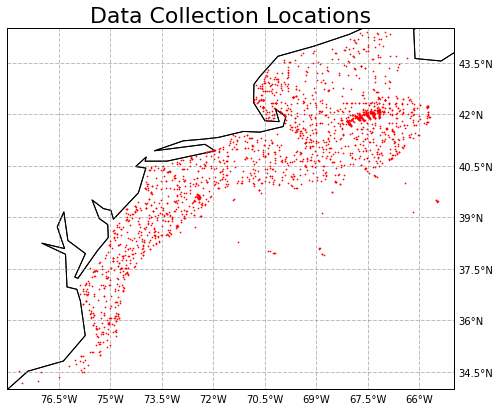

In [29]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
 
longitudeneg1977 = -1 * longitude1977
latitudeneg1977 = 1 * latitude1977

plt.figure(figsize=(8, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-78, -65, 34, 44.5], ccrs.PlateCarree())
ax.coastlines(resolution='110m')
# ax.add_feature(cartopy.feature.STATES, linewidth=1.5, edgecolor='black',alpha=0.3)
ax.add_feature(cartopy.feature.COASTLINE)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.title('Data Collection Locations', size = 22)
plt.plot(longitudeneg1977, latitudeneg1977,  linewidth=0, markersize=0.7, marker='o', color='red')
plt.show()

In [105]:
new = df_2009['yd'].value_counts
newone = df_2009.groupby('yd').count()

print(newone)

     cast  lat  lon  yr  dyd  depth  pc  vn  np   s   t   p  cru  opsid  gear
yd                                                                           
15      3    3    3   3    3      3   3   3   3   2   3   3    3      3     3
16      2    2    2   2    2      2   2   2   2   2   2   2    2      2     2
17      4    4    4   4    4      4   4   4   4   4   4   4    4      4     4
18      4    4    4   4    4      4   4   4   4   4   4   4    4      4     4
19      3    3    3   3    3      3   3   3   3   3   3   3    3      3     3
..    ...  ...  ...  ..  ...    ...  ..  ..  ..  ..  ..  ..  ...    ...   ...
320     7    7    7   7    7      7   7   7   7   7   7   7    7      7     7
321    23   23   23  23   23     23  23  23  23  23  23  23   23     23    23
322    28   28   28  28   28     28  28  28  28  28  28  28   28     28    28
323    16   16   16  16   16     16  16  16  16  16  16  16   16     16    16
324     2    2    2   2    2      2   2   2   2   2   2   2    2

In [ ]:
mat1977 = scipy.io.loadmat('casts_1977.mat')
mat1978 = scipy.io.loadmat('casts_1978.mat')
mat1979 = scipy.io.loadmat('casts_1979.mat')

mat1980 = scipy.io.loadmat('casts_1980.mat')
mat1981 = scipy.io.loadmat('casts_1981.mat')
mat1982 = scipy.io.loadmat('casts_1982.mat')
mat1983 = scipy.io.loadmat('casts_1983.mat')
mat1984 = scipy.io.loadmat('casts_1984.mat')
mat1985 = scipy.io.loadmat('casts_1985.mat')
mat1986 = scipy.io.loadmat('casts_1986.mat')
mat1987 = scipy.io.loadmat('casts_1987.mat')
mat1988 = scipy.io.loadmat('casts_1988.mat')
mat1989 = scipy.io.loadmat('casts_1989.mat')

mat1990 = scipy.io.loadmat('casts_1990.mat')
mat1991 = scipy.io.loadmat('casts_1991.mat')
mat1992 = scipy.io.loadmat('casts_1992.mat')
mat1993 = scipy.io.loadmat('casts_1993.mat')
mat1994 = scipy.io.loadmat('casts_1994.mat')
mat1995 = scipy.io.loadmat('casts_1995.mat')
mat1996 = scipy.io.loadmat('casts_1996.mat')
mat1997 = scipy.io.loadmat('casts_1997.mat')
mat1998 = scipy.io.loadmat('casts_1998.mat')
mat1999 = scipy.io.loadmat('casts_1999.mat')

mat2000 = scipy.io.loadmat('casts_2000.mat')
mat2001 = scipy.io.loadmat('casts_2001.mat')
mat2002 = scipy.io.loadmat('casts_2002.mat')
mat2003 = scipy.io.loadmat('casts_2003.mat')
mat2004 = scipy.io.loadmat('casts_2004.mat')
mat2005 = scipy.io.loadmat('casts_2005.mat')
mat2006 = scipy.io.loadmat('casts_2006.mat')
mat2007 = scipy.io.loadmat('casts_2007.mat')
mat2008 = scipy.io.loadmat('casts_2008.mat')
mat2009 = scipy.io.loadmat('casts_2009.mat')